K Means Clustering Algorithm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


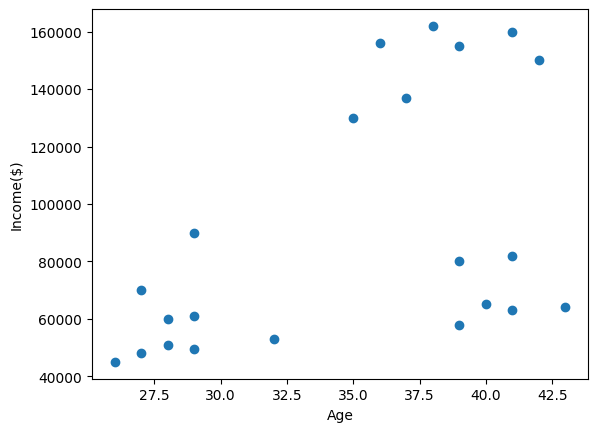

In [4]:
# Plotting scatter plot for age and income
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'],df['Income($)'])

Creating KMeans model

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) # Creating object of KMeans algorithm where value of k is 3

In [6]:
# Now fit the data in model and predict the clusters
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Pytho

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
# We got 3 clusters 0,1,2 now we add one clusters column to our dataframe
df['clusters'] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


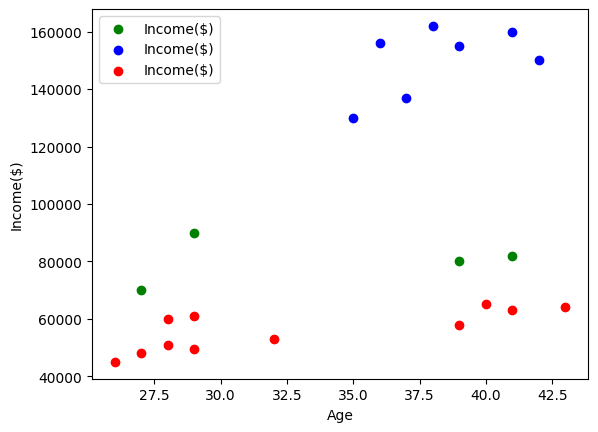

In [8]:
# Now plot the clusters
# First we need to make different dataframes of different clusters
df0 = df[df.clusters == 0] 
df1 = df[df.clusters == 1] 
df2 = df[df.clusters == 2]

plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color = 'blue')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(["Income($)","Income($)","Income($)"])
plt.show()

Note : We can see that green cluster is good but there are some errors in red and blue cluster so we need to correct them, so one thing we can do is scalling the data using minmaxscaller

In [9]:
# PreProcessing data using MinMaxScaler - It will scale the data between 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Scale the income data
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),clusters
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [11]:
# Scale the Age data
scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [12]:
# Now predict the y using scale data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
# Update the cluster column
df['clusters'] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


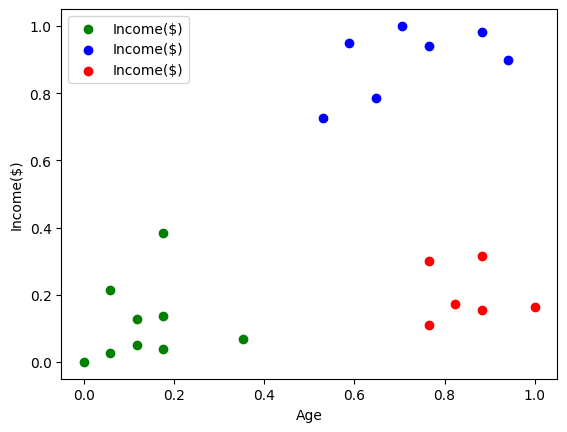

In [14]:
# Plotting the scatter plot of scale data
df0 = df[df.clusters == 0] 
df1 = df[df.clusters == 1] 
df2 = df[df.clusters == 2]

plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color = 'blue')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(["Income($)","Income($)","Income($)"])
plt.show()

In [15]:
# Centroid of each clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

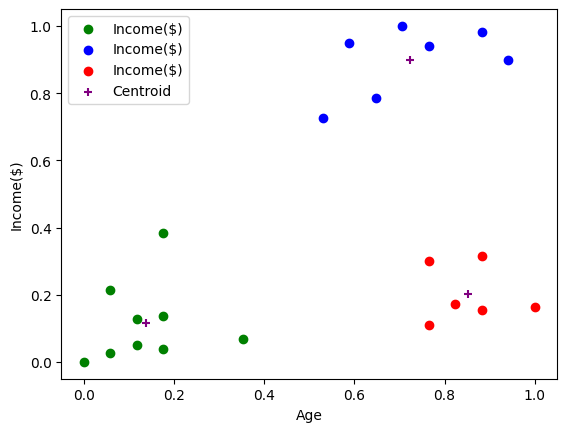

In [16]:
# Add the centroid of each cluster
plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color = 'blue')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='+')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(["Income($)","Income($)","Income($)","Centroid"])
plt.show()

In [17]:
# Try to find which k value is good for clustering the data using Elbow Method
k_rng = range(1,11)
sse = [] # To store Sum of squared error of each k value
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # inertia_ method will give sse of K Means Clustering

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [18]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.174623865866879,
 0.13265419827245162,
 0.10188787724979426,
 0.07996937425152906]

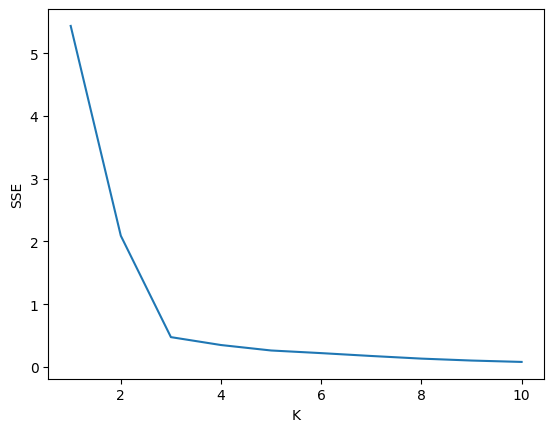

In [20]:
# Ploting the k value and sse according to that value
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)